# Data Ingestion to Database

In [2]:
import pandas as pd
import os
from sqlalchemy import create_engine
import logging
import time

logging.basicConfig(
    filename="Vendor Analysis/logs/ingestion_db.log",
    level=logging.DEBUG,
    format="%(asctime)s - %(levelname)s - %(message)s",
    filemode="a"
)

engine = create_engine('sqlite:///inventory.db')

def ingest_db(df, table_name, engine):
    '''this function will ingest the dataframe into database table'''
    df.to_sql(table_name, con=engine, if_exists='replace', index=False)
    
def load_raw_data():
    '''this function will load the CSVs as dataframe and ingest into db'''
    start = time.time()
    for file in os.listdir('Vendor Analysis'):
        if '.csv' in file:
            df = pd.read_csv('Vendor Analysis/'+file)
            logging.info(f'Ingesting {file} in db')
            ingest_db(df, file[:-4], engine)
    end = time.time()
    total_time = (end - start)/60
    logging.info('-------------Ingestion Complete-------------')
    logging.info(f'\nTotal Time Taken: {total_time} minutes')

if __name__ == '__main__':
    load_raw_data()

# Exploratory Data Analysis
Understanding the dataset to explore how the data is present in the database and if there is a need of creating some aggregated tables that can help with :
1. Vendor selection for profitability
2. Product pricing optimization

In [1]:
import pandas as pd
import sqlite3

In [2]:
#creating connection to database
conn=sqlite3.connect('inventory.db')

In [3]:
# checking tables present in the database
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table'", conn)
tables

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice


In [4]:
#checking data in each table
for table in tables['name']:
    print('-'*50, f'{table}', '-'*50)
    print('Count of records:', pd.read_sql(f"select count(*) as count from {table}", conn)['count'].values[0])
    display(pd.read_sql(f"select * from {table} limit 5", conn))

-------------------------------------------------- begin_inventory --------------------------------------------------
Count of records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


-------------------------------------------------- sales --------------------------------------------------
Count of records: 11086854


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


In [7]:
purchases = pd.read_sql_query("select * from purchases where VendorNumber=4466",conn)
purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

,,Quantity,Dollars
Brand,PurchasePrice,,
3140,11.19,4640,51921.60
5215,9.41,4923,46325.43
5255,9.35,6215,58110.25


1. The purchases table contains actual purchase data, including the date of purchase, products (brands) purchased by vendors, the amount paid (in dollars), and the quantity purchased.

2. The purchase price column is derived from the purchase_prices table, which provides product-wise actual and purchase prices. The combination of vendor and brand is unique in this table.

3. The vendor_invoice table aggregates data from the purchases table, summarizing quantity and dollar amounts, along with an additional column for freight. This table maintains uniqueness based on vendor and PO number.

4. The sales table captures actual sales transactions, detailing the brands purchased by vendors, the quantity sold, the selling price, and the revenue earned.

As the data that we need for analysis is distributed in different tables, we need to create a summary table containing:

1. purchase transactions made by vendors

2. sales transaction data

3. freight costs for each vendor

4. actual product prices from vendors

In [9]:
freight_summary = pd.read_sql_query("""Select VendorNumber, SUM(Freight) as FreightCost From vendor_invoice Group BY VendorNumber""",conn)

In [10]:
freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [11]:
pd.read_sql_query("""SELECT
p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as ActualPrice,
SUM(p.Quantity) as TotalPurchaseQuantity,
SUM(p.Dollars) as TotalPurchaseDollars
FROM purchases p
JOIN purchase_prices pp
ON p.Brand = pp.Brand
Where p.PurchasePrice > 0
GROUP BY p.VendorNumber, p.VendorName, p.Brand
ORDER BY TotalPurchaseDollars""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseQuantity,TotalPurchaseDollars
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,1,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1,1.47
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,2,1.48
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,6,2.34
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2,2.64
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,138109,3023206.01
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,201682,3261197.94
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,187407,3418303.68
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,164038,3804041.22


In [ ]:
import time
start=time.time()
final_table = pd.read_sql_query("""SELECT
pp.VendorNumber,
pp.Brand,
pp.Price as ActualPrice,
pp.PurchasePrice,
SUM(s.SalesQuantity) AS TotalSalesQuantity,
SUM(s.SalesDollars) AS TotalSalesDollars,
SUM(s.SalesPrice) AS TotalSalesPrice,
SUM(s.ExciseTax) AS TotalExciseTax,
SUM(vi.Quantity) AS TotalPurchaseQuantity,
SUM(vi.Dollars) AS TotalPurchaseDollars,
SUM(vi.Freight) AS TotalFreightCost
FROM purchase_prices pp
JOIN sales s
ON pp.VendorNumber = s.VendorNo
AND pp.Brand = s.Brand
JOIN vendor_invoice vi
ON pp.VendorNumber = vi.VendorNumber
GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice""",conn)
end=time.time()

The above query takes a lot of time and is not optimized. Below is an optimized query

In [14]:
vendor_sales_summary = pd.read_sql_query("""WITH FreightSummary AS (
    SELECT
        VendorNumber,
        SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),
PurchaseSummary AS (
    SELECT
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, 
             p.PurchasePrice, pp.Price, pp.Volume
),
SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
)
SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
   AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
""", conn)

In [15]:
vendor_sales_summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,124057.0,4472379.43,603924.00,227940.62,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,138123.0,4177698.73,505619.65,253787.38,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,166415.0,4051290.35,414770.89,305773.62,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,163571.0,3702680.29,377209.42,300549.22,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,117131.0,3662084.69,487507.71,215215.33,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,NaN,NaN,NaN,NaN,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,62.0,123.38,63.68,13.02,257032.07


This query generates a vendor-wise sales and purchase summary, which is valuable for:

Performance Optimization:

1. The query involves heavy joins and aggregations on large datasets like sales and purchases.

2. Storing the pre-aggregated results avoids repeated expensive computations.

3. Helps in analyzing sales, purchases, and pricing for different vendors and brands.

4. Future Benefits of Storing this data for faster Dashboarding & Reporting.

5. Instead of running expensive queries each time, dashboards can fetch data quickly from vendor_sales_summary.

In [16]:
vendor_sales_summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                    object
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [17]:
vendor_sales_summary.isnull().sum()

VendorNumber               0
VendorName                 0
Brand                      0
Description                0
PurchasePrice              0
ActualPrice                0
Volume                     0
TotalPurchaseQuantity      0
TotalPurchaseDollars       0
TotalSalesQuantity       429
TotalSalesDollars        429
TotalSalesPrice          429
TotalExciseTax           429
FreightCost                0
dtype: int64

In [18]:
vendor_sales_summary['Volume']=vendor_sales_summary['Volume'].astype('float64')

In [19]:
vendor_sales_summary.fillna(0, inplace=True)

In [21]:
vendor_sales_summary['VendorName']=vendor_sales_summary['VendorName'].str.strip()

In [22]:
vendor_sales_summary['GrossProfit']=vendor_sales_summary['TotalSalesDollars']-vendor_sales_summary['TotalPurchaseDollars']

In [23]:
vendor_sales_summary['ProfitMargin']=(vendor_sales_summary['GrossProfit']/vendor_sales_summary['TotalSalesDollars'])*100

In [24]:
vendor_sales_summary['StockTurnover']=vendor_sales_summary['TotalSalesQuantity']/vendor_sales_summary['TotalPurchaseQuantity']

In [25]:
vendor_sales_summary['SalestoPurchaseRatio']=vendor_sales_summary['TotalSalesDollars']/vendor_sales_summary['TotalPurchaseDollars']

In [26]:
cursor=conn.cursor()

In [27]:
cursor.execute("""CREATE TABLE vendor_sales_summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume ,
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(15,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(15,2),
    TotalSalesPrice DECIMAL(15,2),
    TotalExciseTax DECIMAL(15,2),
    FreightCost DECIMAL(15,2),
    GrossProfit DECIMAL(15,2),
    ProfitMargin DECIMAL(15,2),
    StockTurnover DECIMAL(15,2),
    SalesToPurchaseRatio DECIMAL(15,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")


In [30]:
vendor_sales_summary.to_sql('vendor_sales_summary', conn, if_exists='replace', index = False)

10692

# Vendor Performance Analysis

**Importing Librarires**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [33]:
df= pd.read_sql_query("select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,124057.0,4472379.43,603924.00,227940.62,68601.68,661127.83,14.782463,0.855094,1.173467
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,138123.0,4177698.73,505619.65,253787.38,144929.24,373657.51,8.944099,0.842018,1.098226
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,166415.0,4051290.35,414770.89,305773.62,123780.22,632986.67,15.624323,0.887987,1.185176
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,163571.0,3702680.29,377209.42,300549.22,257032.07,441482.35,11.923318,0.811034,1.135374
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,117131.0,3662084.69,487507.71,215215.33,257032.07,638878.68,17.445765,0.848105,1.211325


In [34]:
#summary stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,2.631169e+03,9487.111922,0.00,26.000000,210.500000,1597.250000,2.963900e+05
TotalSalesDollars,10692.0,3.595467e+04,144366.150356,0.00,557.640000,4355.265000,24102.702500,4.472379e+06
TotalSalesPrice,10692.0,1.615160e+04,39320.473617,0.00,208.832500,2282.940000,13543.485000,6.039240e+05


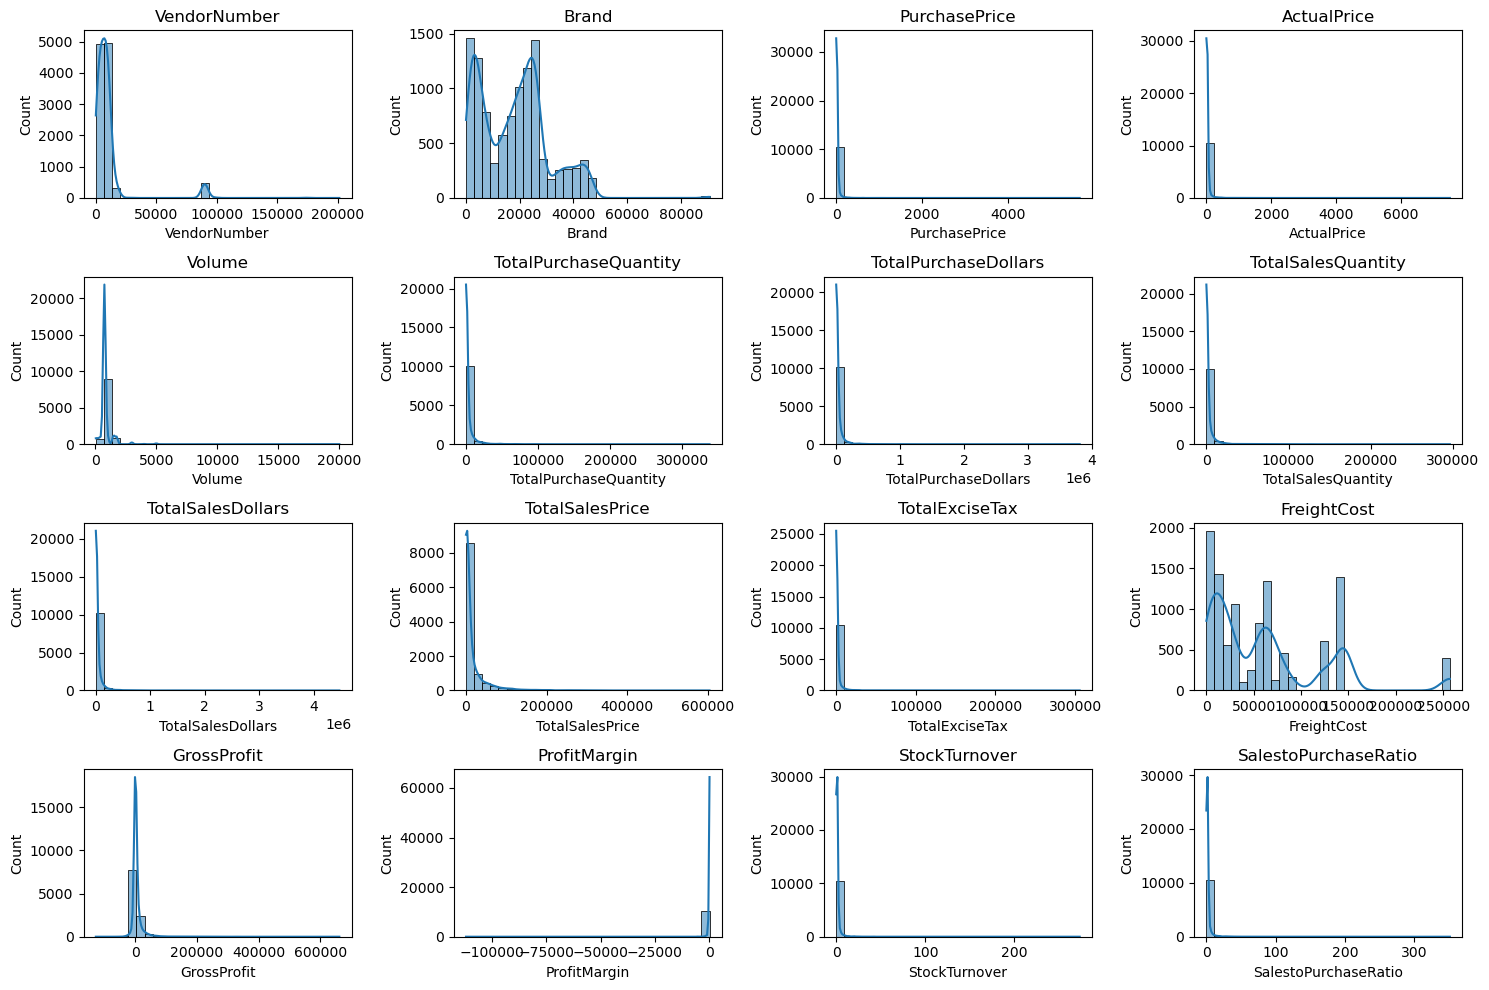

In [35]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

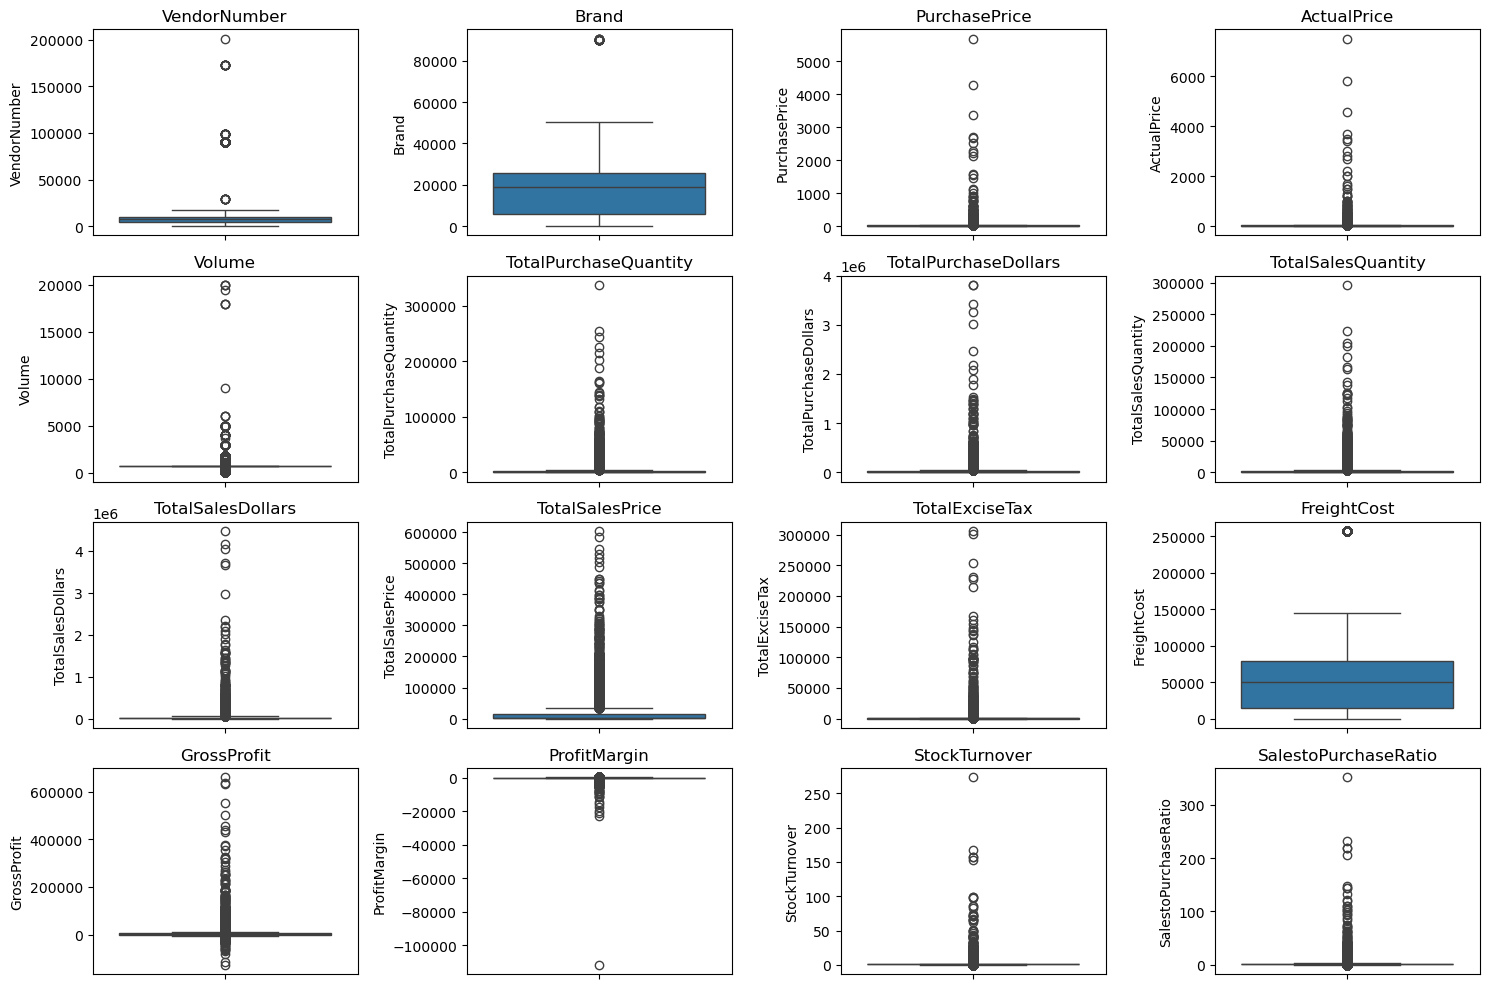

In [36]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## Summary Statistics Insights:

**Negative & Zero Values:**

1. Gross Profit: Minimum value is -52,002.78, indicating losses. Some products or transactions may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

2. Profit Margin: Has a minimum of -∞, which suggests cases where revenue is zero or even lower than costs.

3. Total Sales Quantity & Sales Dollars: Minimum values are 0, meaning some products were purchased but never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Standard Deviations:**

1. Purchase & Actual Prices: The max values (5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

2. Freight Cost: Huge variation, from 0.09 to 257,032.07, suggests logistics inefficiencies or bulk shipments.

3. Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that Sold quantity for that product is higher than purchased quantity due to either sales are being fulfilled from older stock.

In [37]:
# filter out data by removing inconsistencies
df= pd.read_sql_query("""select * from
vendor_sales_summary
where GrossProfit>0
and ProfitMargin>0
and TotalSalesQuantity>0""", conn)

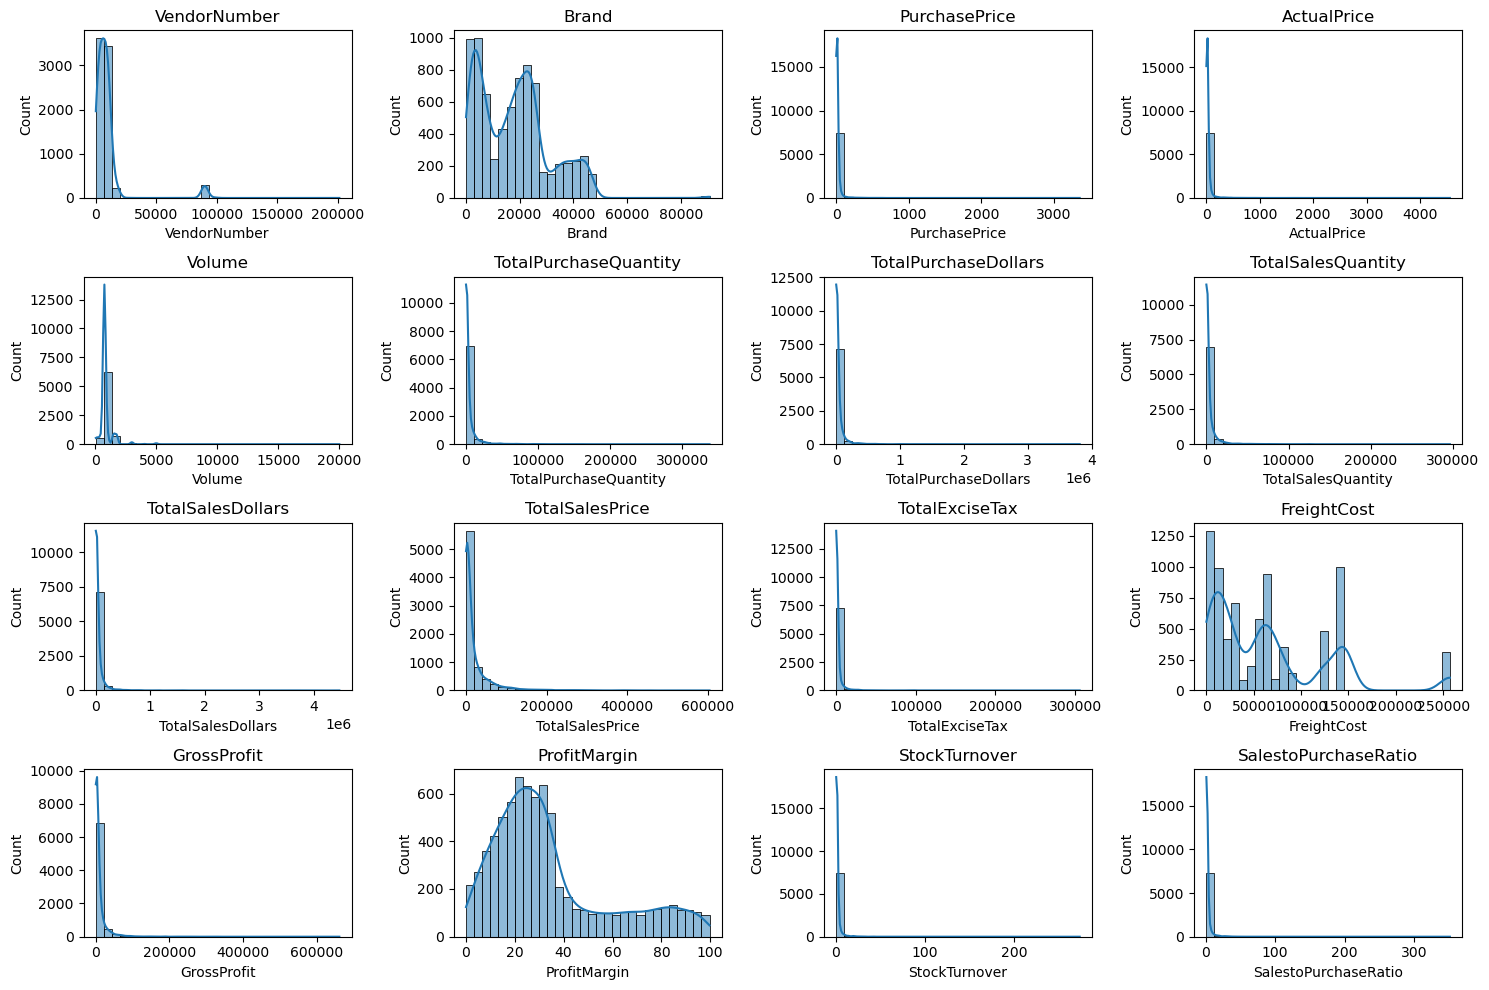

In [38]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)  # Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()

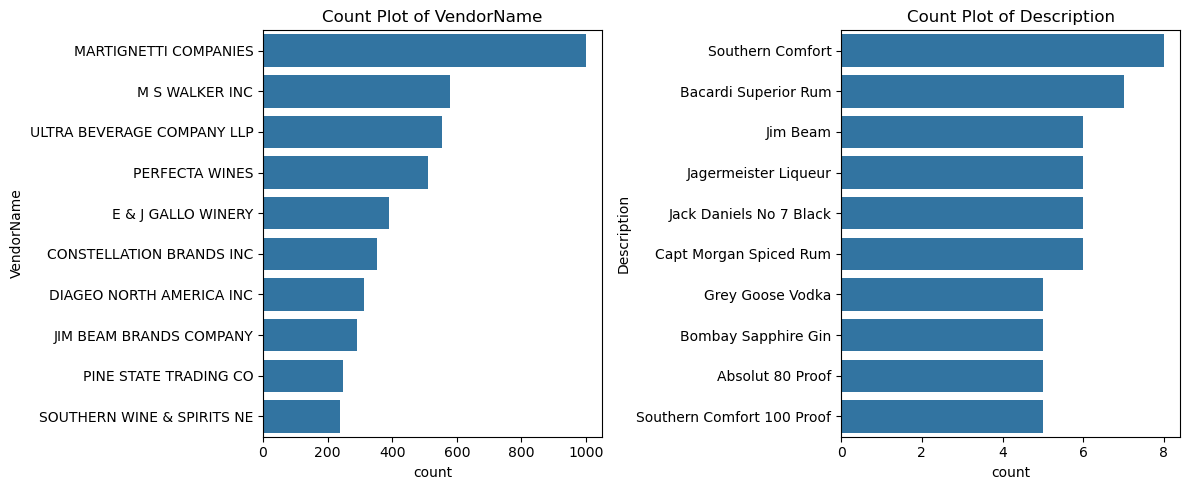

In [39]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])  # Top 10 categories
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

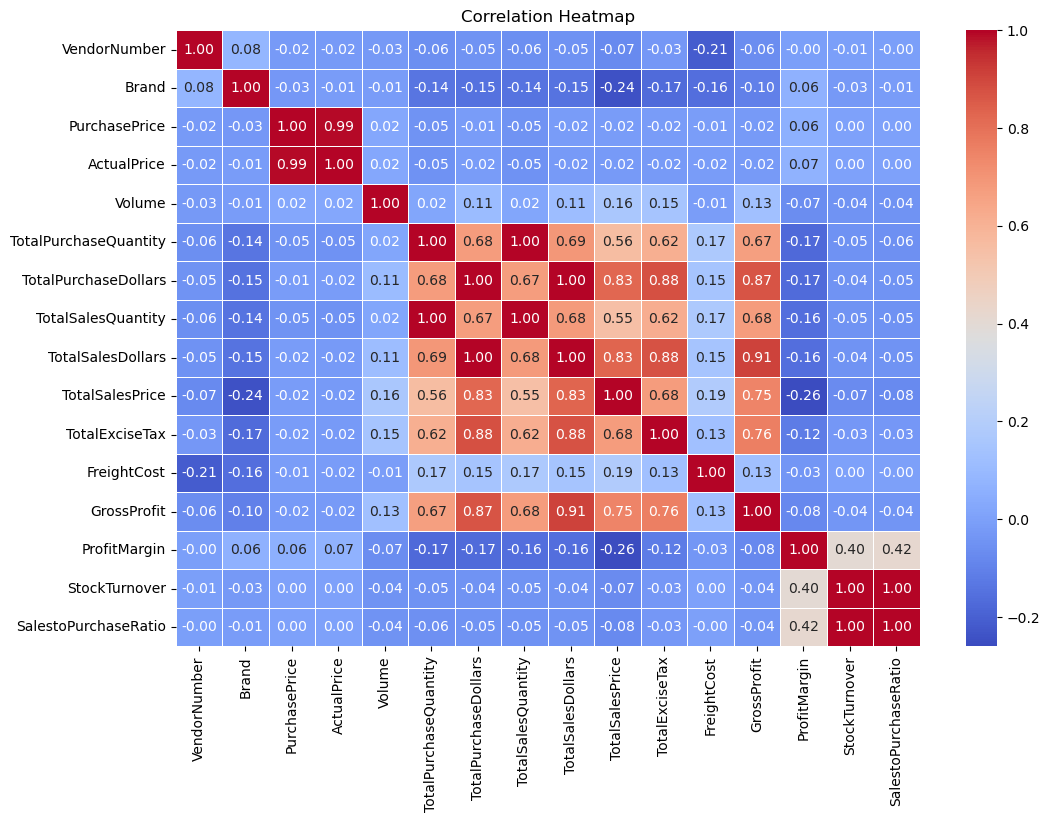

In [40]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## Correlation Insights

1. PurchasePrice has weak correlations with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.

2. Strong correlation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

3. Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.

4. StockTurnover has weak negative correlations with both GrossProfit (-0.038) and ProfitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability

## Data Analysis

In [41]:
brand_performance=df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [42]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [43]:
low_sales_threshold

573.553

In [44]:
high_margin_threshold

67.07917403131766

In [45]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
1890,Concannon Glen Ellen Wh Zin,15.95,83.448276
1994,Crown Royal Apple,27.86,89.806174
5549,Sauza Sprklg Wild Berry Marg,27.96,82.153076
4310,Merry Irish Cream Liqueur,35.97,73.533500
6391,Tracia Syrah,44.94,88.495772
...,...,...,...
1467,Ch Lacoste-Borie Pauillac 10,558.87,69.230769
3135,Harthill Farms Cab Svgn,560.92,89.346074
2471,Ermita Sn Felices Rose Rioja,570.64,89.832469
1968,Couvent des Thorins Moulin,571.78,96.949876


In [47]:
#for better visualization
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000]

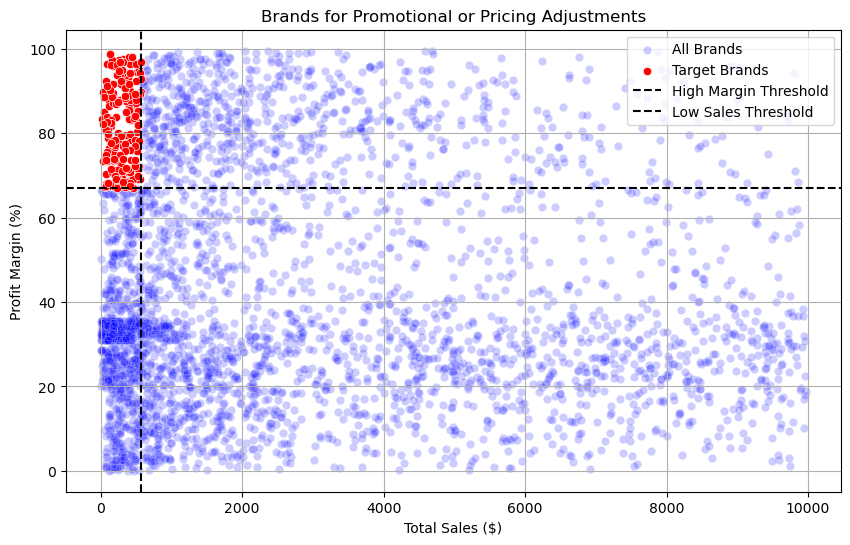

In [48]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin',
                color='blue', label="All Brands", alpha=0.2)

sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin',
                color='red', label="Target Brands")

plt.axhline(high_margin_threshold, linestyle='--', color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}K"
    else:
        return str(value)

In [50]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

top_vendors

VendorName
DIAGEO NORTH AMERICA INC      52418019.97
MARTIGNETTI COMPANIES         32821780.96
JIM BEAM BRANDS COMPANY       25593957.07
PERNOD RICARD USA             23327984.60
BACARDI USA INC               21133316.42
CONSTELLATION BRANDS INC      20607390.62
E & J GALLO WINERY            15464528.47
BROWN-FORMAN CORP             15017938.42
ULTRA BEVERAGE COMPANY LLP    13406524.96
M S WALKER INC                12182611.45
Name: TotalSalesDollars, dtype: float64

In [51]:
top_brands.apply(lambda x : format_dollars (x))

Description
Jack Daniels No 7 Black    6.91M
Tito's Handmade Vodka      6.35M
Grey Goose Vodka           6.29M
Absolut 80 Proof           5.51M
Capt Morgan Spiced Rum     5.25M
Ketel One Vodka            4.38M
Baileys Irish Cream        3.16M
Tanqueray                  3.06M
Jim Beam                   2.92M
Kahlua                     2.89M
Name: TotalSalesDollars, dtype: object

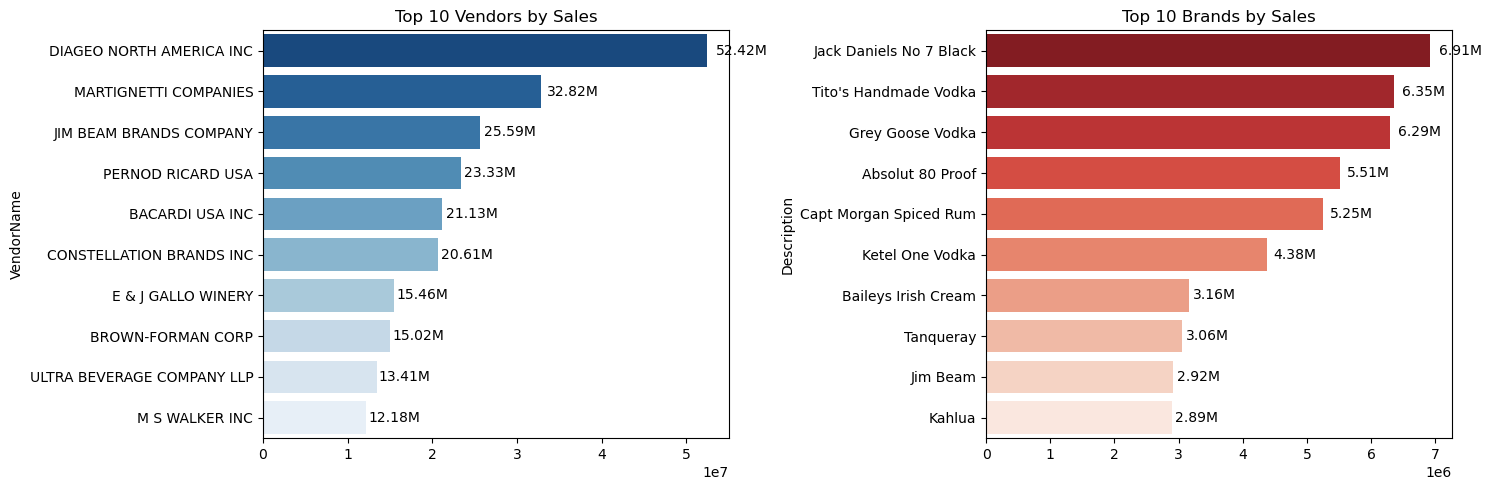

In [52]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

# Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

In [53]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars': 'sum',
    'GrossProfit': 'sum',
    'TotalSalesDollars': 'sum'
}).reset_index()

In [63]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

In [69]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [70]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)

top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,44.41M,8.01M,52.42M,15.73
56,MARTIGNETTI COMPANIES,24.66M,8.16M,32.82M,8.74
45,JIM BEAM BRANDS COMPANY,21.69M,3.90M,25.59M,7.69
67,PERNOD RICARD USA,19.97M,3.36M,23.33M,7.07
6,BACARDI USA INC,16.90M,4.23M,21.13M,5.99
20,CONSTELLATION BRANDS INC,14.80M,5.81M,20.61M,5.24
11,BROWN-FORMAN CORP,12.55M,2.47M,15.02M,4.45
30,E & J GALLO WINERY,11.72M,3.75M,15.46M,4.15
103,ULTRA BEVERAGE COMPANY LLP,10.18M,3.23M,13.41M,3.61
52,M S WALKER INC,9.21M,2.98M,12.18M,3.26


In [71]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,Cumulative_Contribution%
25,DIAGEO NORTH AMERICA INC,44.41M,8.01M,52.42M,15.73,15.73
56,MARTIGNETTI COMPANIES,24.66M,8.16M,32.82M,8.74,24.47
45,JIM BEAM BRANDS COMPANY,21.69M,3.90M,25.59M,7.69,32.16
67,PERNOD RICARD USA,19.97M,3.36M,23.33M,7.07,39.23
6,BACARDI USA INC,16.90M,4.23M,21.13M,5.99,45.22
20,CONSTELLATION BRANDS INC,14.80M,5.81M,20.61M,5.24,50.46
11,BROWN-FORMAN CORP,12.55M,2.47M,15.02M,4.45,54.91
30,E & J GALLO WINERY,11.72M,3.75M,15.46M,4.15,59.06
103,ULTRA BEVERAGE COMPANY LLP,10.18M,3.23M,13.41M,3.61,62.67
52,M S WALKER INC,9.21M,2.98M,12.18M,3.26,65.93


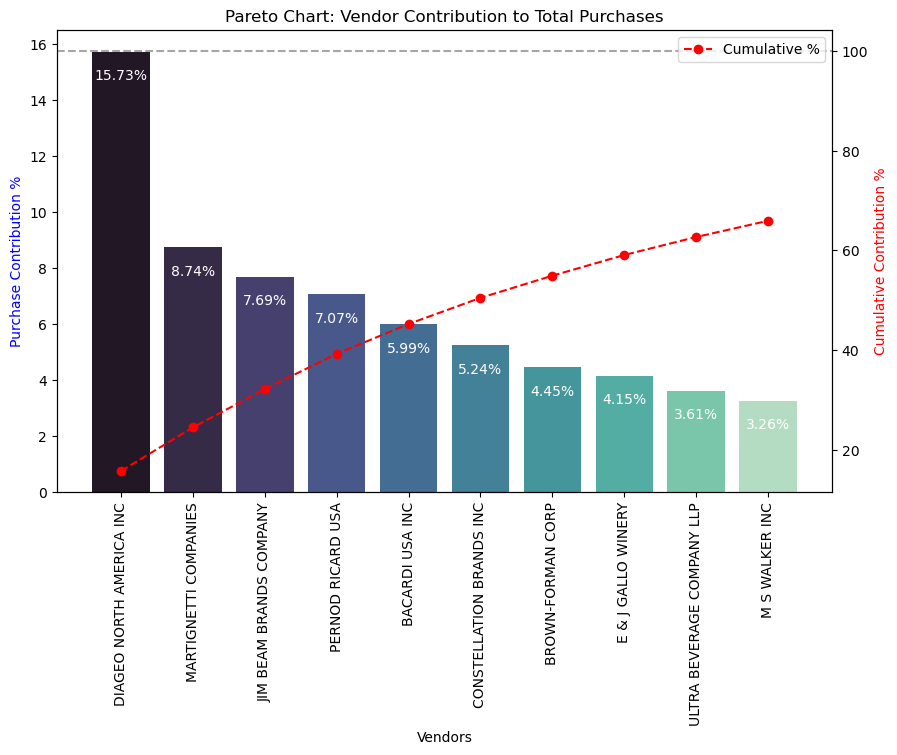

In [72]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'],
            palette="mako", ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha='center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'],
         color='red', marker='o', linestyle='dashed', label='Cumulative %')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution %', color='blue')
ax2.set_ylabel('Cumulative Contribution %', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

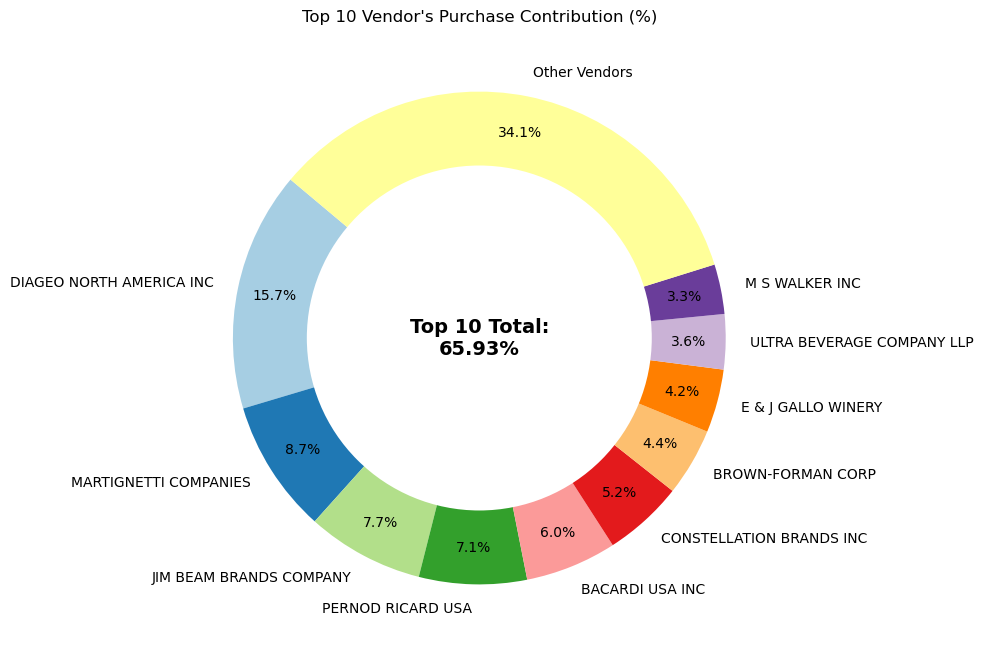

In [74]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels=vendors, autopct='%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold',
         ha='center', va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()

In [76]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

df['OrderSize'] = pd.qcut(df["TotalPurchaseQuantity"], q=3, labels=["Small", "Medium", "Large"])

df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,40.419383
Medium,14.063785
Large,10.317827


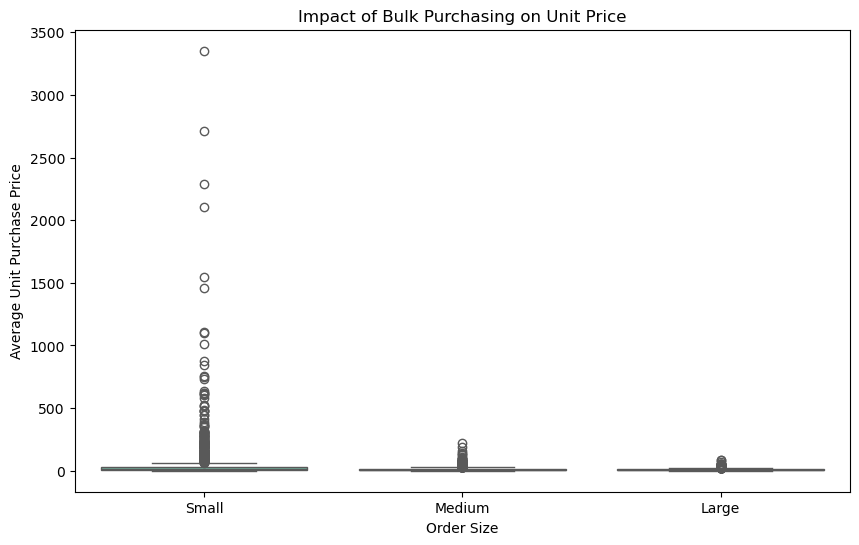

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()